In [4]:
# Fix the required "not implemented" functions for the homework ("TODO")

################################################################################
## LOGISTIC REGRESSION BINARY CLASSIFIER #######################################
################################################################################


class logisticClassify2(ml.classifier):
    """A binary (2-class) logistic regression classifier

    Attributes:
        classes : a list of the possible class labels
        theta   : linear parameters of the classifier
    """

    def __init__(self, *args, **kwargs):
        """
        Constructor for logisticClassify2 object.

        Parameters: Same as "train" function; calls "train" if available

        Properties:
           classes : list of identifiers for each class
           theta   : linear coefficients of the classifier; numpy array
        """
        self.classes = [0,1]              # (default to 0/1; replace during training)
        self.theta = np.array([])         # placeholder value before training

        if len(args) or len(kwargs):      # if we were given optional arguments,
            self.train(*args,**kwargs)    #  just pass them through to "train"


## METHODS ################################################################

    def plotBoundary(self,X,Y):
        """ Plot the (linear) decision boundary of the classifier, along with data """
        if len(self.theta) != 3: raise ValueError('Data & model must be 2D');
        ax = X.min(0),X.max(0); ax = (ax[0][0],ax[1][0],ax[0][1],ax[1][1]);
        ## TODO: find points on decision boundary defined by theta0 + theta1 X1 + theta2 X2 == 0
        x1b = np.array([ax[0],ax[1]]);  # at X1 = points in x1b
        # TODO find x2 values as a function of x1's values
        th0, th1, th2 = self.theta[0], self.theta[1], self.theta[2]
        x2b = (-th0 - th1*x1b) / th2
        ## Now plot the data and the resulting boundary:
        A = Y==self.classes[0]; # and plot it:
        plt.plot(X[A,0],X[A,1],'b.',X[~A,0],X[~A,1],'r.',x1b,x2b,'k-'); plt.axis(ax); plt.draw();

    def predictSoft(self, X):
        """ Return the probability of each class under logistic regression """
        raise NotImplementedError
        ## You do not need to implement this function.
        ## If you *want* to, it should return an Mx2 numpy array "P", with
        ## P[:,1] = probability of class 1 = sigma( theta*X )
        ## P[:,0] = 1 - P[:,1] = probability of class 0
        return P

    def predict(self, X):
        """ Return the predictied class of each data point in X"""
        # raise NotImplementedError
        ## TODO: compute linear response r[i] = theta0 + theta1 X[i,1] + theta2 X[i,2] + ... for each i
        ## TODO: if z[i] > 0, predict class 1:  Yhat[i] = self.classes[1]
        ##       else predict class 0:  Yhat[i] = self.classes[0]
        Z = self.theta[0] + X.dot(self.theta[1:])
        Yhat = self.classes[(Z > 0).astype(int)]
        return Yhat


    def train(self, X, Y, initStep=1.0, stopTol=1e-4, stopEpochs=5000, plot=None):
        """ Train the logistic regression using stochastic gradient descent """
        def sigmoid(z):
            return 1 / (1 + np.exp(-z))
        
        M,N = X.shape;                     # initialize the model if necessary:
        self.classes = np.unique(Y);       # Y may have two classes, any values
        XX = np.hstack((np.ones((M,1)),X)) # XX is X, but with an extra column of ones
        YY = ml.toIndex(Y,self.classes);   # YY is Y, but with canonical values 0 or 1
        if len(self.theta)!=N+1: self.theta=np.random.rand(N+1);
        # init loop variables:
        epoch=0; done=False; Jnll=[]; J01=[];
        while not done:
            stepsize, epoch = initStep*2.0/(2.0+epoch), epoch+1; # update stepsize
            # Do an SGD pass through the entire data set:
            for i in np.random.permutation(M):
                ri = sigmoid(self.theta.dot(XX[i]));     # TODO: compute linear response r(x)
                gradi = XX[i] * (ri - YY[i]);     # TODO: compute gradient of NLL loss
                self.theta -= stepsize * gradi;  # take a gradient step

            J01.append( self.err(X,Y) )  # evaluate the current error rate

            ## TODO: compute surrogate loss (logistic negative log-likelihood)
            ##  Jsur = sum_i [ (log si) if yi==1 else (log(1-si)) ]
            Jnll.append(np.sum(YY*np.log(sigmoid(XX.dot(self.theta))) - (1-YY)*np.log(1-sigmoid(XX.dot(self.theta))))) # TODO evaluate the current NLL loss
            plt.figure(1); plt.plot(Jnll,'b-',J01,'r-'); plt.draw();    # plot losses
            if N==2: plt.figure(2); self.plotBoundary(X,Y); plt.draw(); # & predictor if 2D
            plt.pause(.01);                    # let OS draw the plot

            ## For debugging: you may want to print current parameters & losses
            print (self.theta, ' => ', Jnll[-1], ' / ', J01[-1])
            # input()   # pause for keystroke

            # TODO check stopping criteria: exit if exceeded # of epochs ( > stopEpochs)
            done = (epoch > stopEpochs) or (epoch >= 2 and (np.abs(Jnll[-1] - Jnll[-2]) < stopTol));   # or if Jnll not changing between epochs ( < stopTol )


################################################################################
################################################################################
################################################################################

In [5]:
import mltools as ml
import data
# from logisticClassify2 import *
import numpy as np

from matplotlib import pyplot as plt
#% matplotlib inline

In [6]:
iris = np.genfromtxt('data/iris.txt', delimiter=None)
X, Y = iris[:,0:2], iris[:, -1]
X, Y = ml.shuffleData(X,Y)
X, _ = ml.rescale(X)

XA, YA = X[Y<2,:], Y[Y<2]
XB, YB = X[Y>0,:], Y[Y>0]

Plot decision boundary corredsponding to sign(.5 + 1x_1 - .25x_2) for Dataset A

# Problem 1: Logistic Regression

## Part 1

In [7]:
# Plot Dataset A:
XA_0 = XA[YA == 0,:]
XA_1 = XA[YA == 1,:]
plt.scatter(XA_0[:,0], XA_0[:,1], c='green', label='class 0')
plt.scatter(XA_1[:,0], XA_1[:,1], c='blue', label='class 1')
plt.legend()

In [8]:
# Plot Dataset B:
XB_1 = XB[YB == 1, :]
XB_2 = XB[YB == 2, :]
plt.scatter(XB_1[:,0], XB_1[:,1], c='blue', label='class 1')
plt.scatter(XB_2[:,0], XB_2[:,1], c='red', label='class 2')
plt.legend()

Clearly, Dataset A is linearly separable and Dataset B is not.

## Part 2

In [9]:
learner = logisticClassify2()
learner.classes = np.unique(YA)
wts = np.array([.5, 1, -.25])
learner.theta = wts
learner.plotBoundary(XA, YA)

Now for Dataset B

In [10]:
learner.classes = np.unique(YB)
learner.plotBoundary(XB, YB)

## Part 3

Error rate on Dataset A

In [9]:
learner = logisticClassify2()
learner.classes = np.unique(YA)
wts = np.array([.5, 1, -.25])
learner.theta = wts
learner.err(XA, YA)

0.050505050505050504

Error rate on Dataset B

In [10]:
learner.classes = np.unique(YB)
learner.theta = wts
learner.err(XB, YB)

0.46464646464646464

## Part 4

C:\Users\johnlu\Desktop\machine-learning-course-hws\hw3\178-hw3-code\mltools\plot.py:42: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  hld = axis.ishold();
C:\Users\johnlu\Desktop\machine-learning-course-hws\hw3\178-hw3-code\mltools\plot.py:43: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  axis.hold(True);
C:\tools\Anaconda3\lib\site-packages\matplotlib\__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\tools\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
C:\Users\j

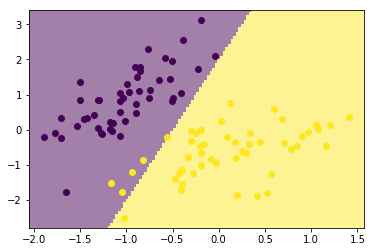

In [11]:
learner.classes = np.unique(YA)
learner.theta = wts
learner.err(XA, YA)

ml.plot.plotClassify2D(learner, XA, YA)

C:\Users\johnlu\Desktop\machine-learning-course-hws\hw3\178-hw3-code\mltools\plot.py:42: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  hld = axis.ishold();
C:\Users\johnlu\Desktop\machine-learning-course-hws\hw3\178-hw3-code\mltools\plot.py:43: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  axis.hold(True);
C:\tools\Anaconda3\lib\site-packages\matplotlib\__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\tools\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
C:\Users\j

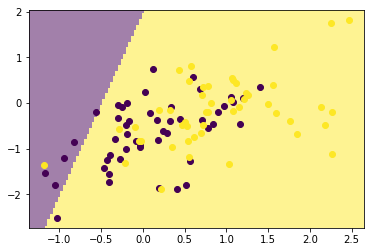

In [13]:
learner.classes = np.unique(YB)
learner.theta = wts
learner.err(XB, YB)

ml.plot.plotClassify2D(learner, XB, YB)

## Part 5

## Part 6

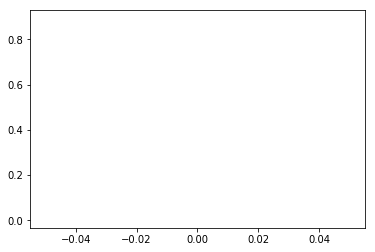

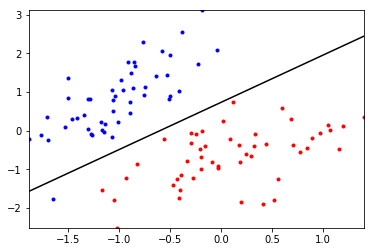

[ 2.25865036  3.75879758 -3.08199637]  =>  0.88471901253  /  0.010101010101


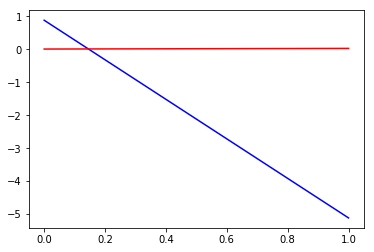

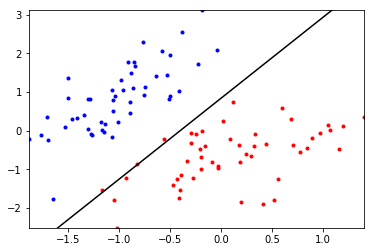

[ 2.13246989  5.31288608 -2.54196702]  =>  -5.11649145542  /  0.030303030303


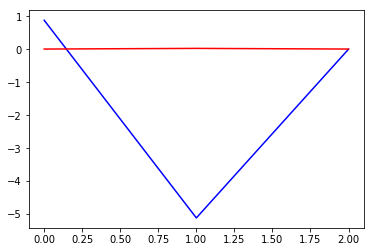

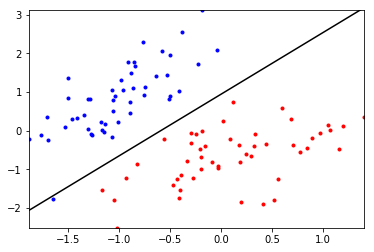

[ 3.0624175   5.16792317 -3.2461968 ]  =>  0.00596060849255  /  0.010101010101


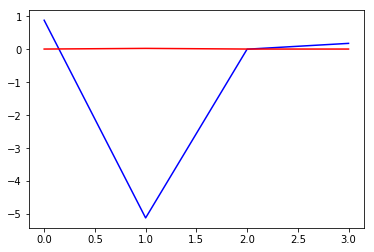

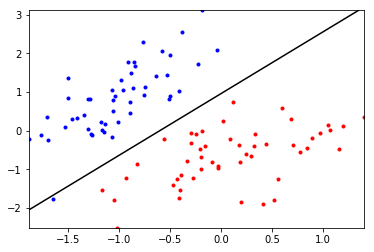

[ 3.27325321  5.43719366 -3.41159568]  =>  0.182571471322  /  0.010101010101


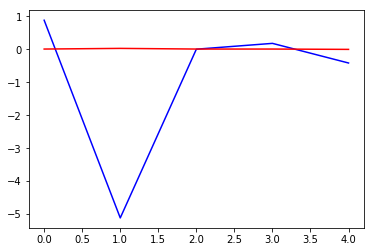

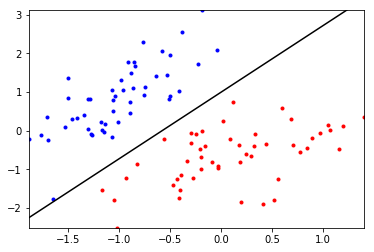

[ 3.34088905  5.77129852 -3.3570269 ]  =>  -0.41334441849  /  0.0


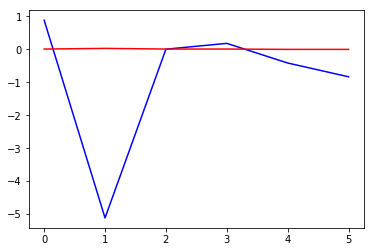

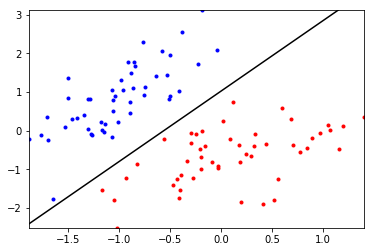

[ 3.39298007  6.03066635 -3.31476726]  =>  -0.831795978727  /  0.0


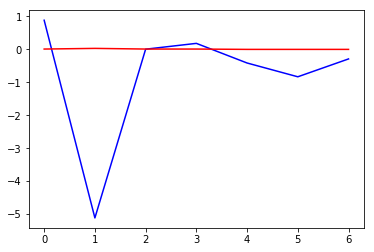

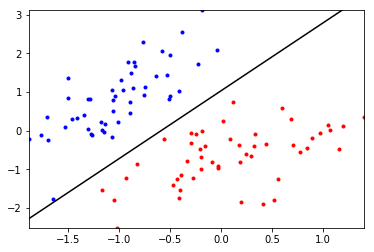

[ 3.57806374  6.07461409 -3.46659937]  =>  -0.289727883458  /  0.0


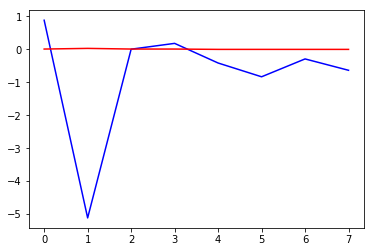

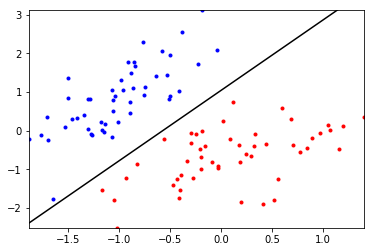

[ 3.59055515  6.26425075 -3.44534327]  =>  -0.634535503692  /  0.0


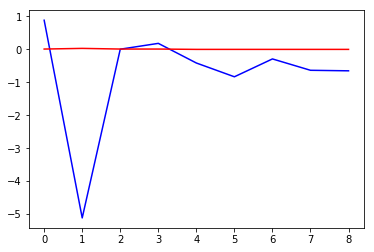

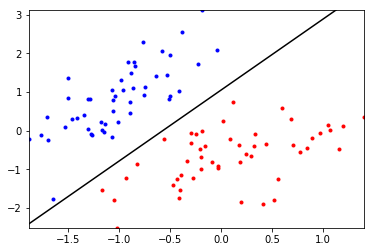

[ 3.65196469  6.37295813 -3.47746153]  =>  -0.650726348739  /  0.0


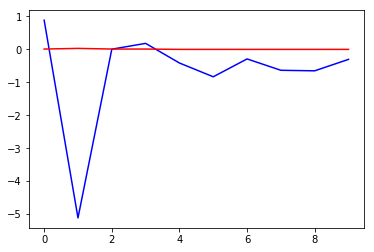

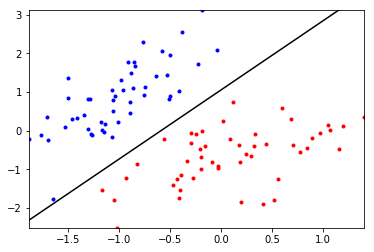

[ 3.77390781  6.39156936 -3.58017398]  =>  -0.302842210574  /  0.0


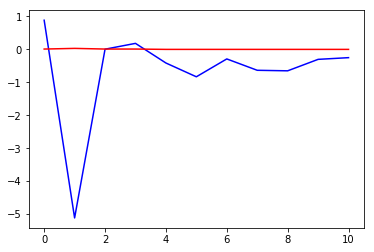

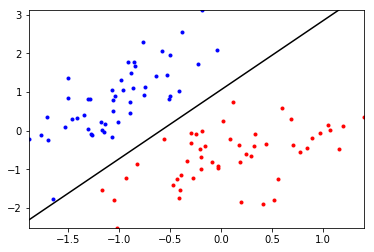

[ 3.83355414  6.4610178  -3.62363988]  =>  -0.251115624378  /  0.0


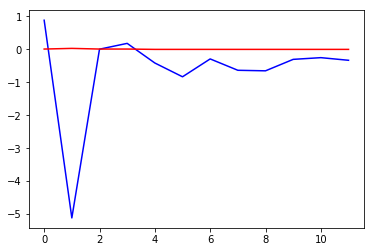

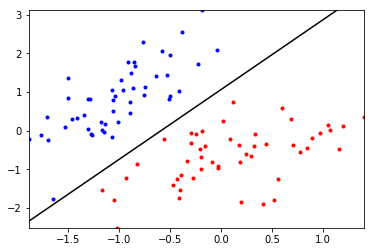

[ 3.86365908  6.55024014 -3.63302069]  =>  -0.330916877832  /  0.0


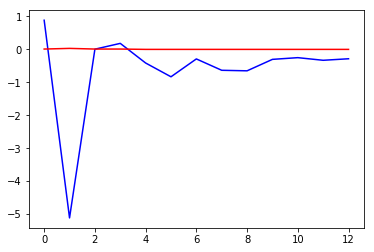

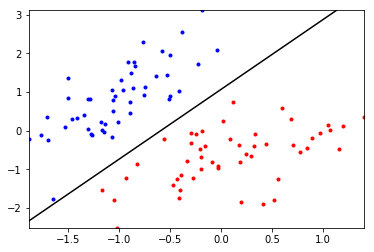

[ 3.91525175  6.60577275 -3.66481813]  =>  -0.284719960233  /  0.0


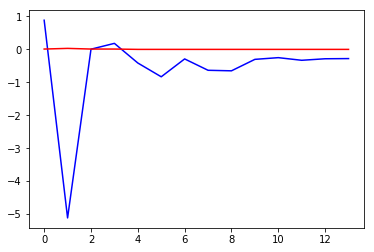

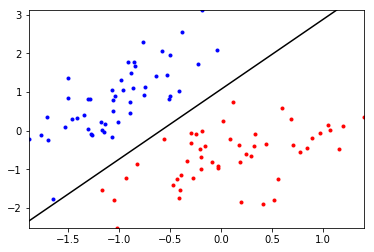

[ 3.95192045  6.66380381 -3.6926421 ]  =>  -0.279286475238  /  0.0


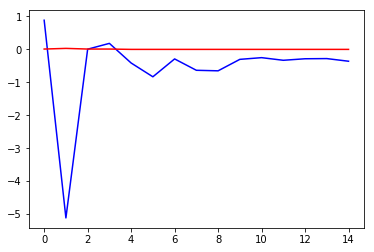

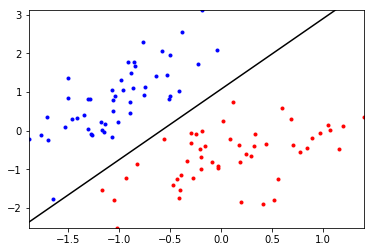

[ 3.96842872  6.7365297  -3.69850737]  =>  -0.359751620181  /  0.0


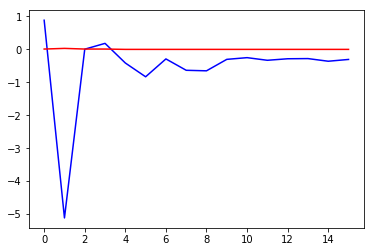

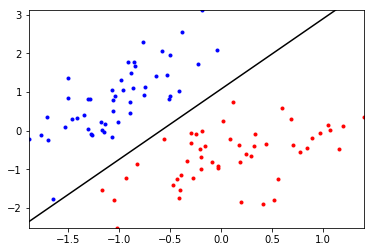

[ 4.01095711  6.77447997 -3.73007004]  =>  -0.305405798418  /  0.0


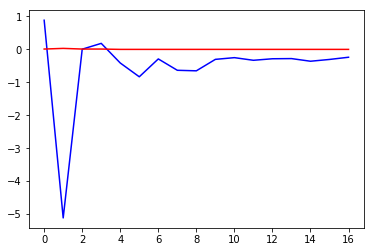

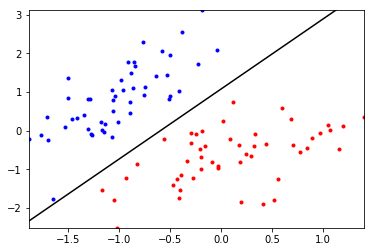

[ 4.05397122  6.80552233 -3.76324953]  =>  -0.238634773395  /  0.0


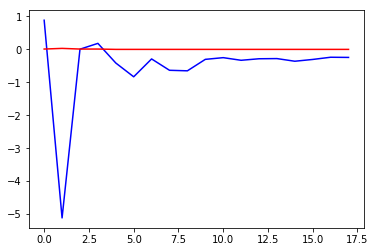

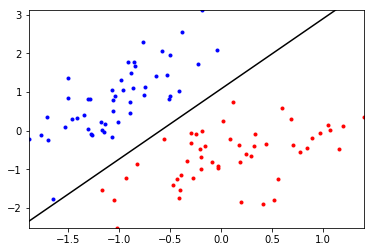

[ 4.08045001  6.85020619 -3.77857495]  =>  -0.243862597304  /  0.0


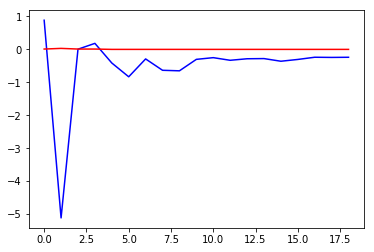

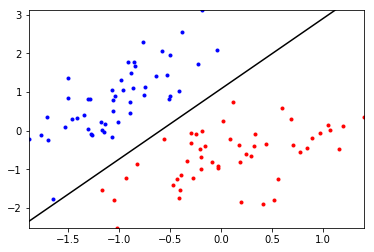

[ 4.10714536  6.88969276 -3.79491171]  =>  -0.239431482926  /  0.0


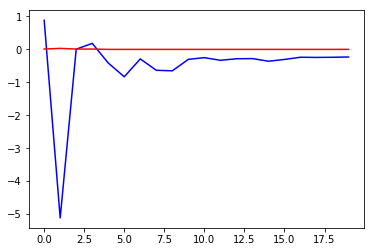

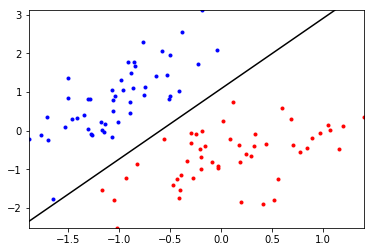

[ 4.13302922  6.92569182 -3.81131532]  =>  -0.231128954679  /  0.0


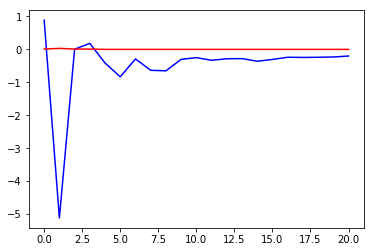

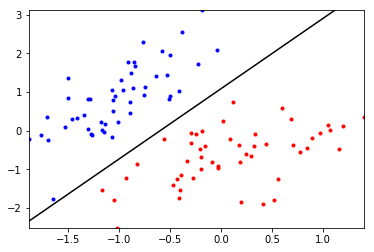

[ 4.16236423  6.95443165 -3.83137611]  =>  -0.201726976123  /  0.0


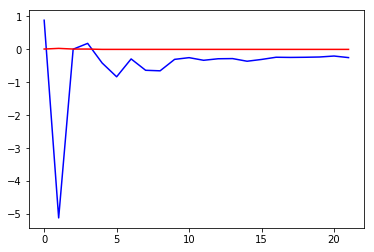

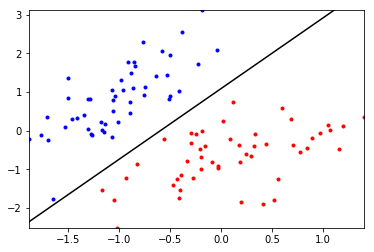

[ 4.1728357   6.99955764 -3.83396749]  =>  -0.249627719757  /  0.0


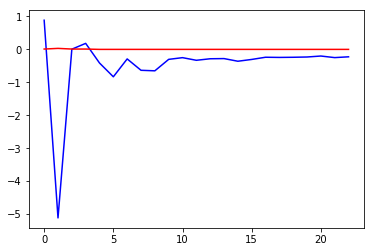

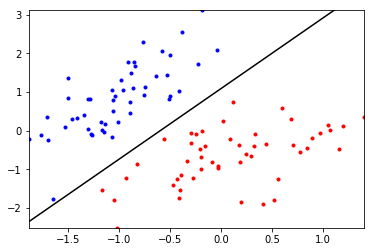

[ 4.19788513  7.02555708 -3.85288983]  =>  -0.225516380029  /  0.0


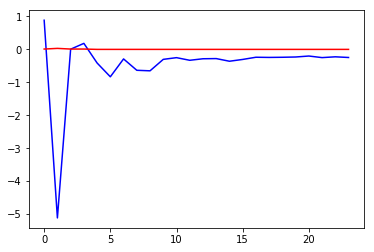

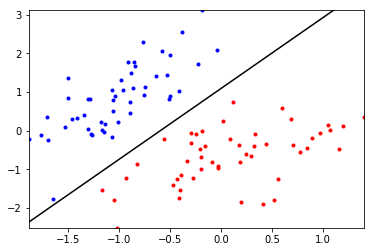

[ 4.21345886  7.06107977 -3.85799604]  =>  -0.246022780277  /  0.0


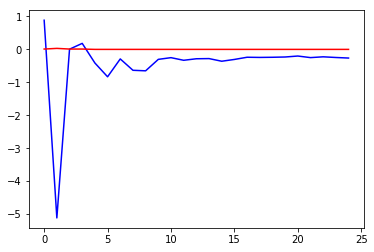

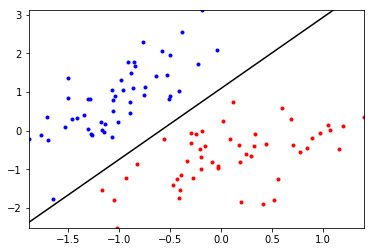

[ 4.22755449  7.09410878 -3.86580569]  =>  -0.262982965205  /  0.0


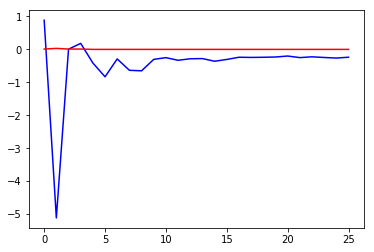

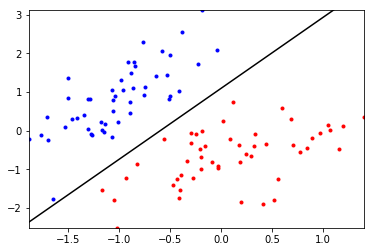

[ 4.25036075  7.11535975 -3.88285556]  =>  -0.23789042334  /  0.0


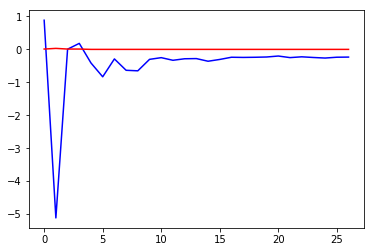

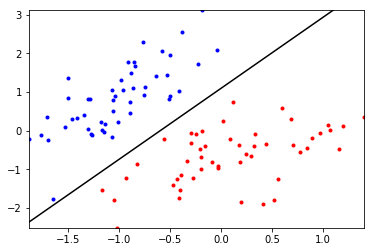

[ 4.26772445  7.14059584 -3.89427588]  =>  -0.233908362438  /  0.0


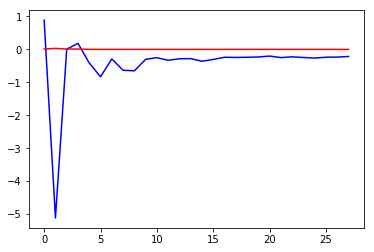

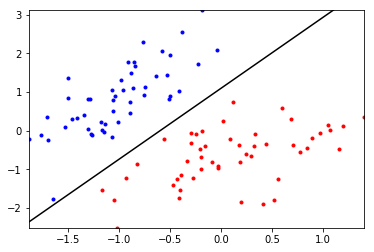

[ 4.28769007  7.16088392 -3.90927309]  =>  -0.21478339949  /  0.0


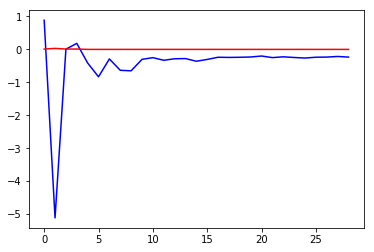

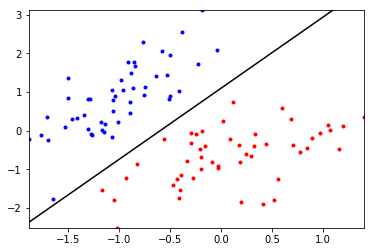

[ 4.29834361  7.18981042 -3.9143132 ]  =>  -0.234090481785  /  0.0


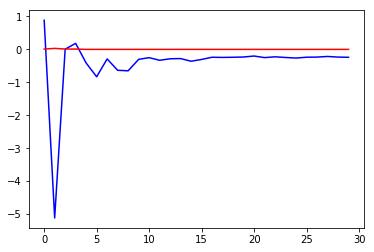

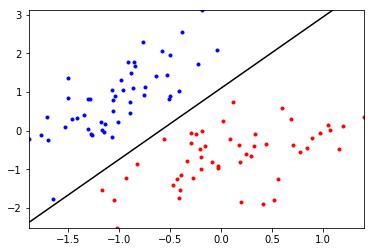

[ 4.31149698  7.21435214 -3.92200238]  =>  -0.23995137147  /  0.0


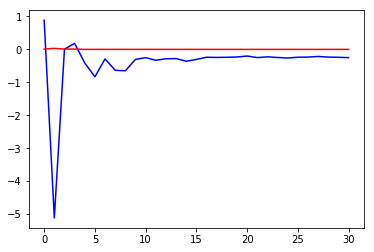

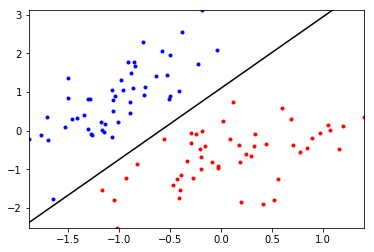

[ 4.32300627  7.23917337 -3.92833732]  =>  -0.250266938482  /  0.0


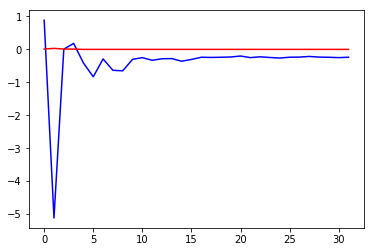

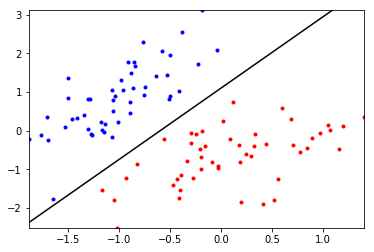

[ 4.33913549  7.25743135 -3.93964966]  =>  -0.238454551442  /  0.0


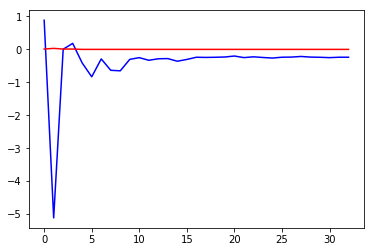

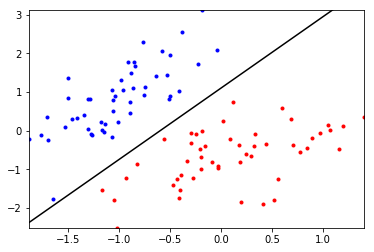

[ 4.35206736  7.27780946 -3.94811365]  =>  -0.237917652794  /  0.0


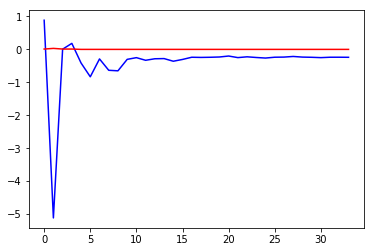

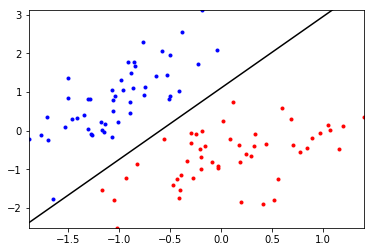

[ 4.36382958  7.2981534  -3.95565227]  =>  -0.24018455627  /  0.0


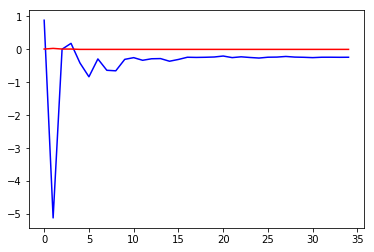

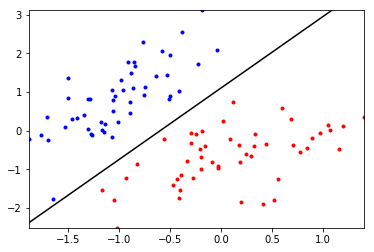

[ 4.37614303  7.31686285 -3.96376885]  =>  -0.238622870097  /  0.0


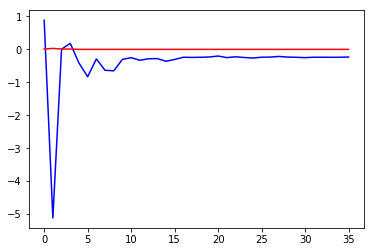

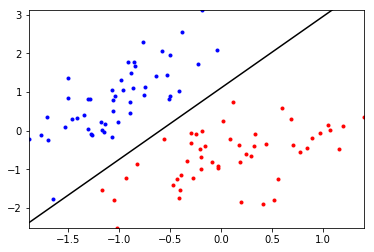

[ 4.38954703  7.33368926 -3.97227624]  =>  -0.232122710948  /  0.0


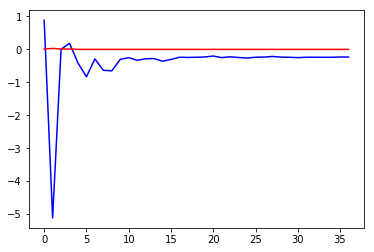

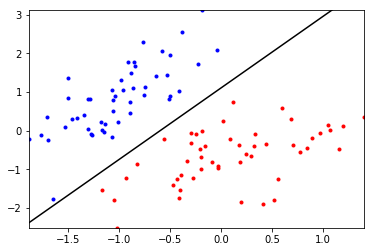

[ 4.40066093  7.35161195 -3.97940344]  =>  -0.232400528637  /  0.0


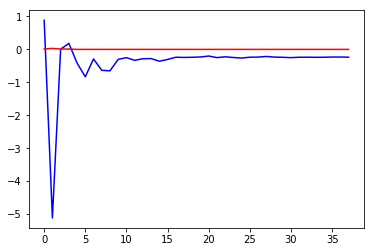

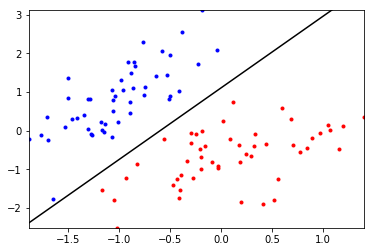

[ 4.41069063  7.37003558 -3.98508086]  =>  -0.236468578727  /  0.0


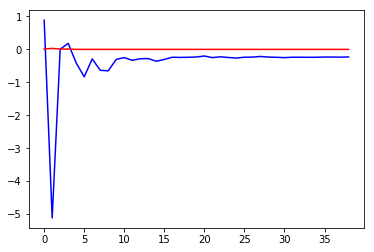

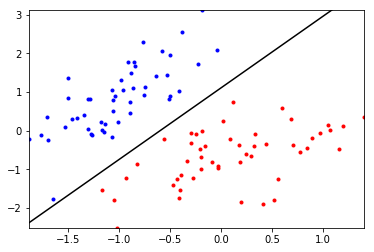

[ 4.42301568  7.38485054 -3.99359226]  =>  -0.22908151001  /  0.0


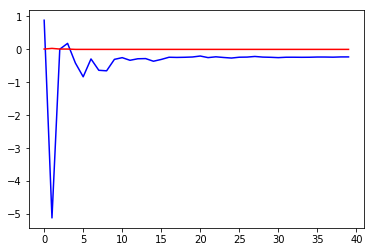

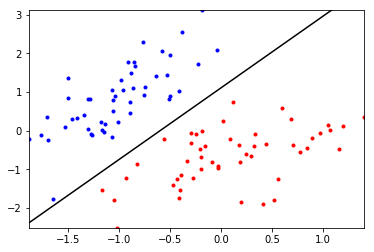

[ 4.43349883  7.40100837 -4.000022  ]  =>  -0.228532785463  /  0.0


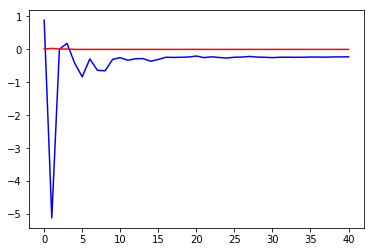

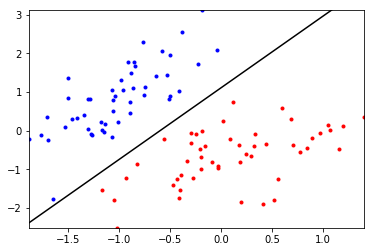

[ 4.44429313  7.41591588 -4.00701543]  =>  -0.225232242798  /  0.0


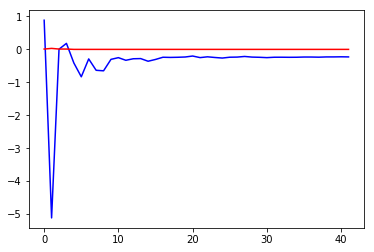

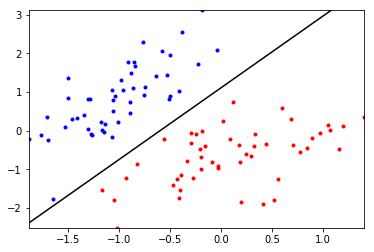

[ 4.45313528  7.43209413 -4.01230934]  =>  -0.22847464064  /  0.0


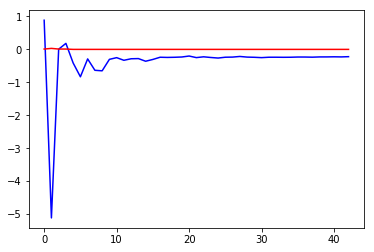

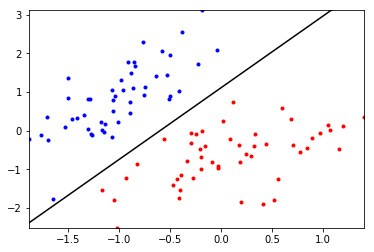

[ 4.464142    7.44507345 -4.02031639]  =>  -0.221316340089  /  0.0


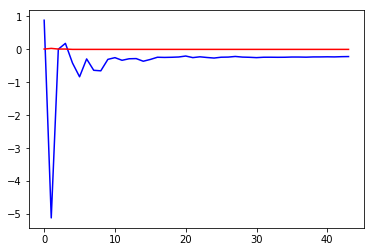

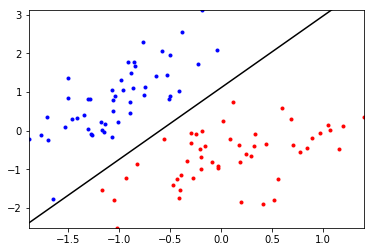

[ 4.47419271  7.45865653 -4.02686257]  =>  -0.217854194109  /  0.0


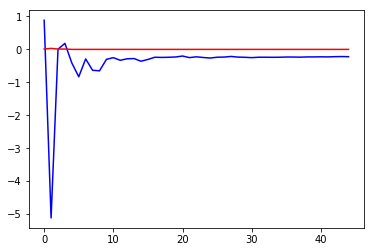

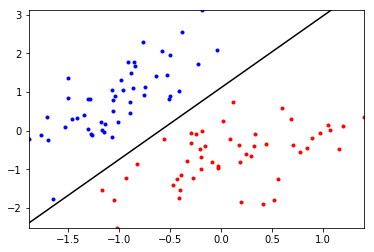

[ 4.48198389  7.47396419 -4.03140463]  =>  -0.22227217649  /  0.0


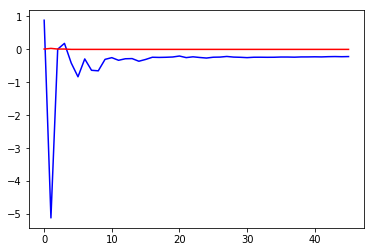

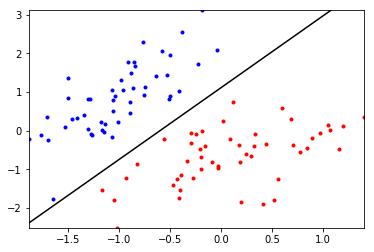

[ 4.49160638  7.48656405 -4.03805943]  =>  -0.218104482296  /  0.0


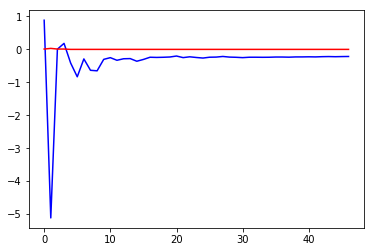

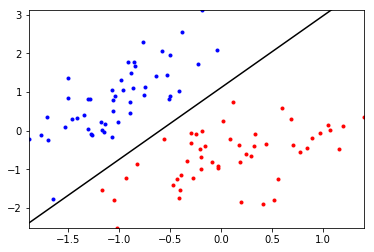

[ 4.50060573  7.49917962 -4.04430602]  =>  -0.215362882808  /  0.0


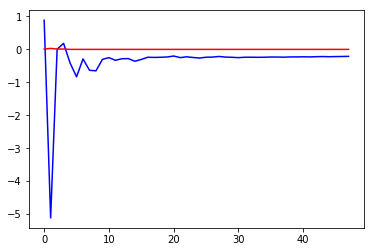

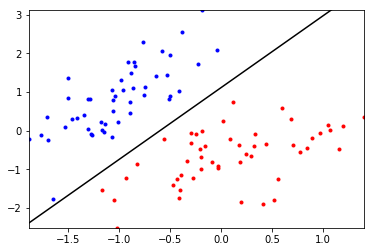

[ 4.5096072   7.51138929 -4.05031004]  =>  -0.21226599744  /  0.0


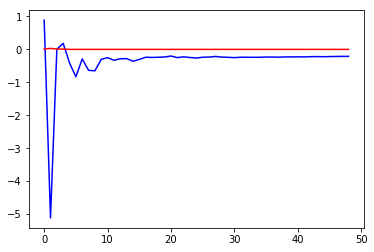

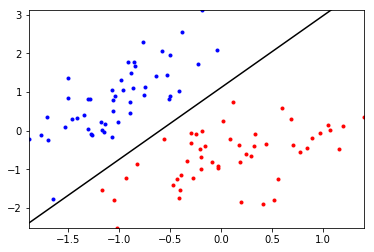

[ 4.51800378  7.52384999 -4.05541516]  =>  -0.211264863669  /  0.0


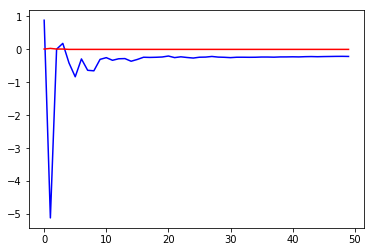

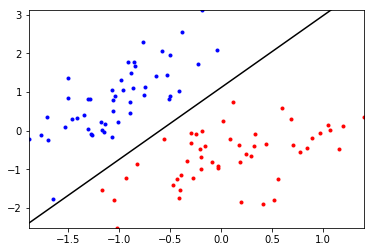

[ 4.52507427  7.53708238 -4.05969808]  =>  -0.214204393743  /  0.0


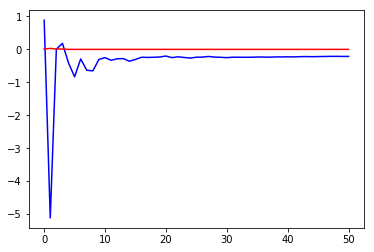

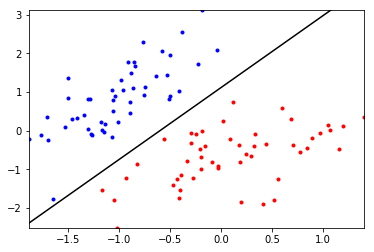

[ 4.53300916  7.5490024  -4.06462687]  =>  -0.213374789794  /  0.0


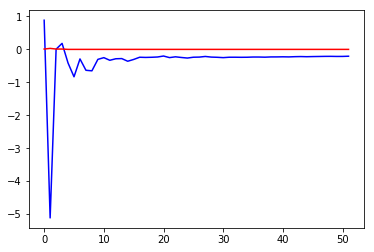

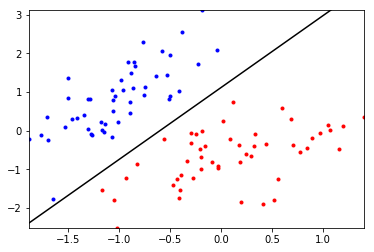

[ 4.54204723  7.5592451  -4.07075389]  =>  -0.207472252697  /  0.0


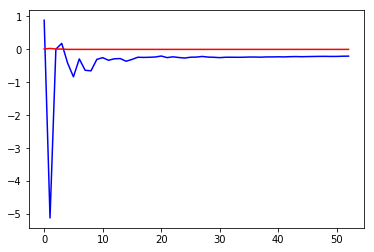

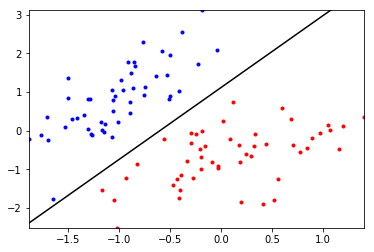

[ 4.54987911  7.57018859 -4.07613571]  =>  -0.205146214421  /  0.0


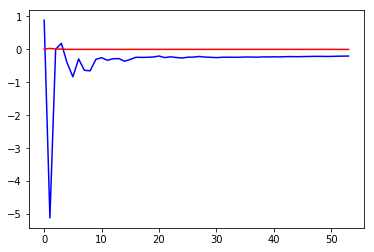

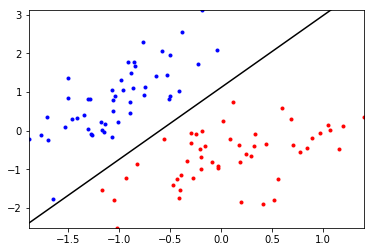

[ 4.55754695  7.58085105 -4.08145887]  =>  -0.202766741023  /  0.0


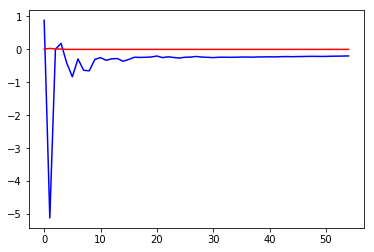

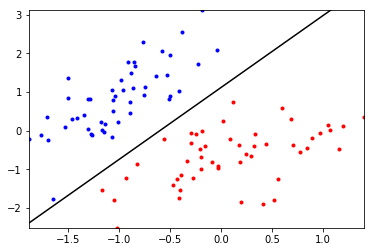

[ 4.56543649  7.59091095 -4.08692337]  =>  -0.199103027854  /  0.0


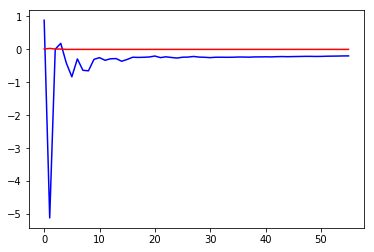

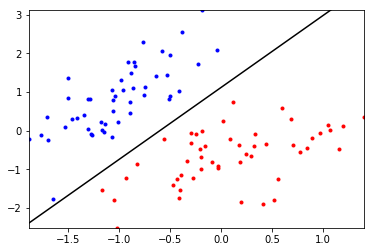

[ 4.57268517  7.60140429 -4.09146667]  =>  -0.197824234835  /  0.0


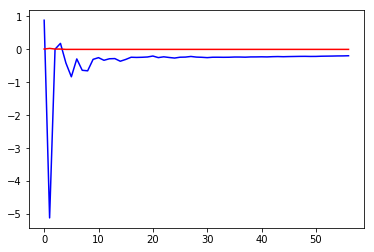

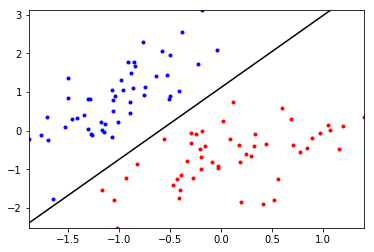

[ 4.58050976  7.61078527 -4.09689706]  =>  -0.193404436707  /  0.0


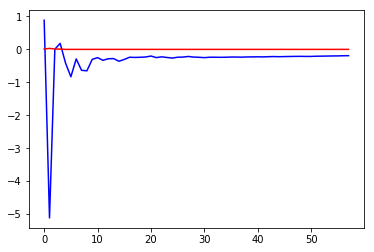

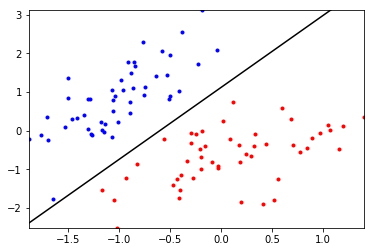

[ 4.58775354  7.62052676 -4.10161444]  =>  -0.191001740911  /  0.0


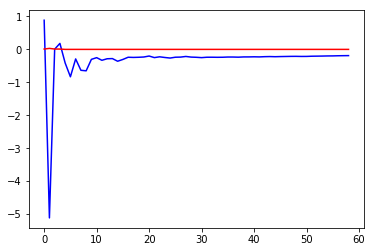

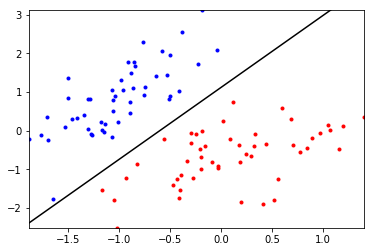

[ 4.59459559  7.63019183 -4.10632196]  =>  -0.189169844692  /  0.0


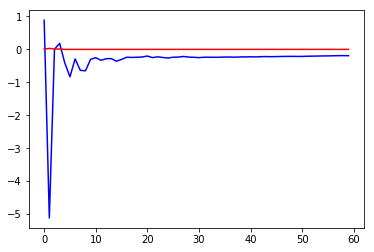

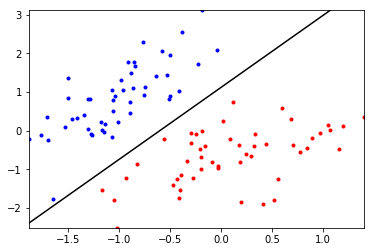

[ 4.60011118  7.6410393  -4.10956446]  =>  -0.192242522273  /  0.0


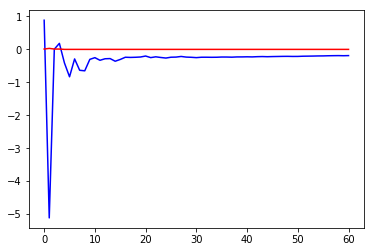

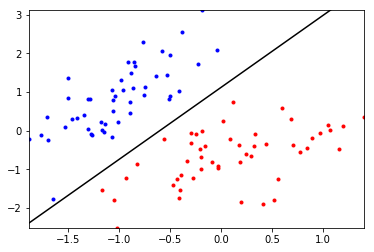

[ 4.60721101  7.64986215 -4.11441684]  =>  -0.188754606589  /  0.0


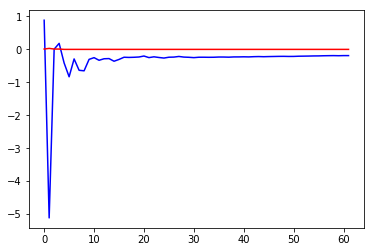

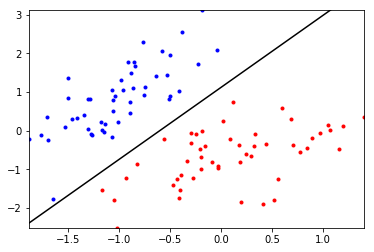

[ 4.6132891   7.659514   -4.11815542]  =>  -0.18891653593  /  0.0


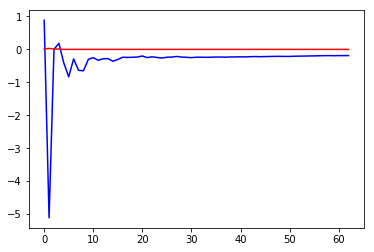

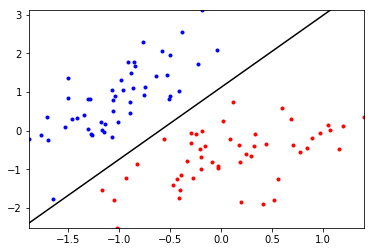

[ 4.6194848   7.66861601 -4.1223193 ]  =>  -0.187821191011  /  0.0


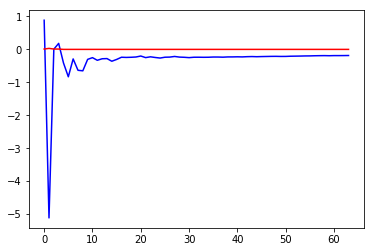

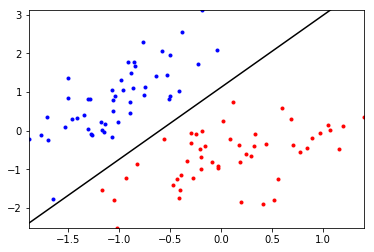

[ 4.62577314  7.677337   -4.12660582]  =>  -0.185977190019  /  0.0


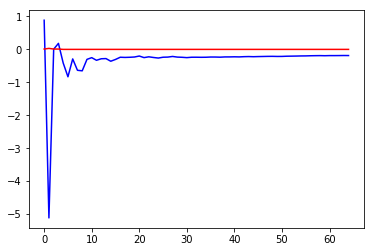

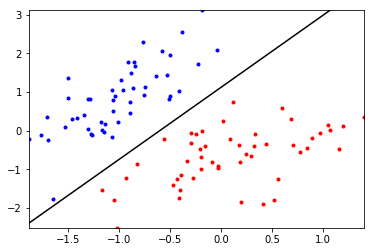

[ 4.63128604  7.68675645 -4.12983129]  =>  -0.187143696409  /  0.0


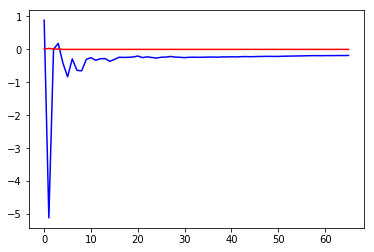

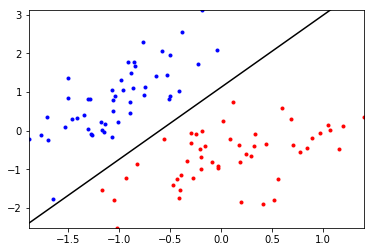

[ 4.63761004  7.69488454 -4.13422303]  =>  -0.184381816936  /  0.0


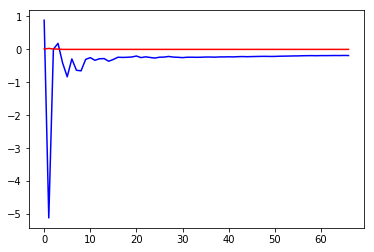

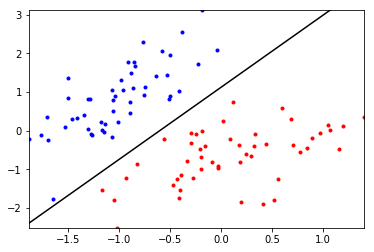

[ 4.64261803  7.7042741  -4.13706787]  =>  -0.186611694934  /  0.0


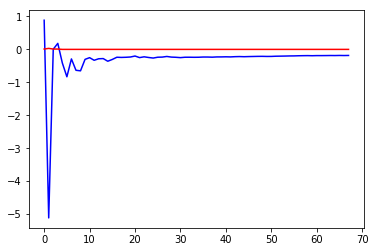

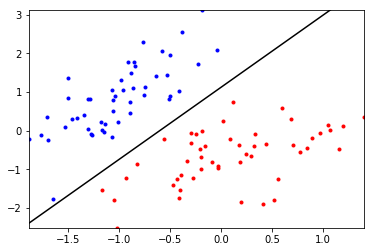

[ 4.64864467  7.71219947 -4.141243  ]  =>  -0.184236257401  /  0.0


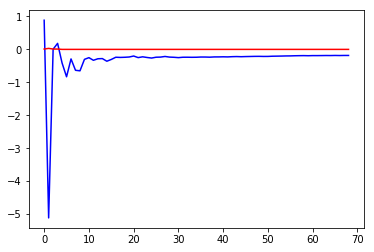

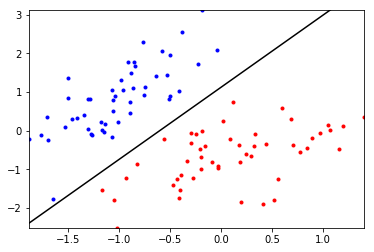

[ 4.6540879   7.72064791 -4.14451586]  =>  -0.184190107907  /  0.0


In [12]:
learner = logisticClassify2()
learner.train(XA, YA)

## Part 7

Logistic regression on Dataset A

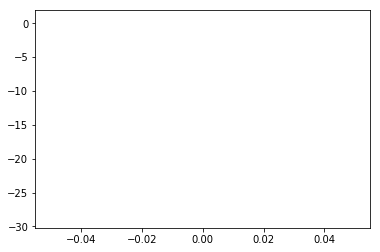

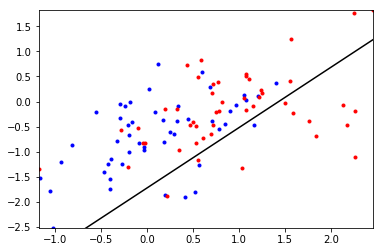

[-1.5704726   1.09608363 -0.91289196]  =>  -28.7396661693  /  0.434343434343


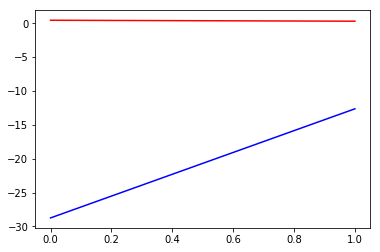

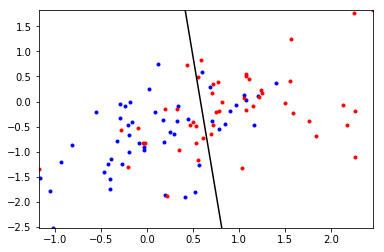

[-1.50848486  2.59133478  0.23779757]  =>  -12.6372463595  /  0.292929292929


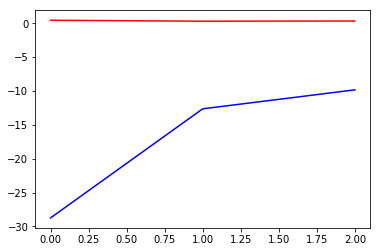

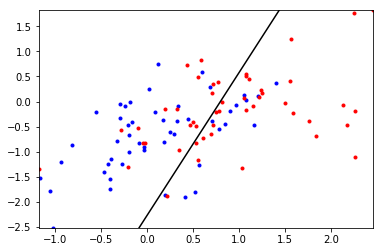

[-1.21432977  1.52128166 -0.53550514]  =>  -9.84113127308  /  0.323232323232


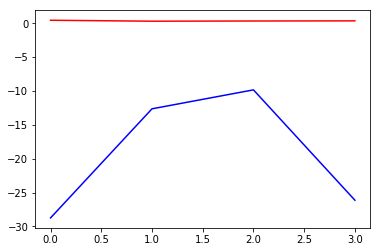

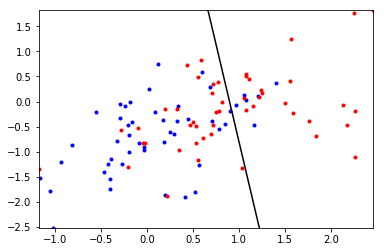

[-1.36036251  1.5157306   0.19541349]  =>  -26.1249990391  /  0.343434343434


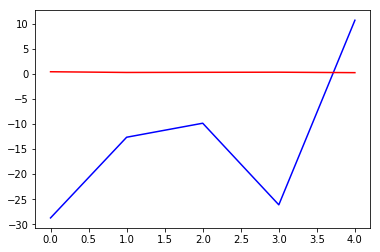

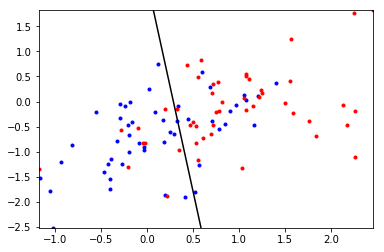

[-0.66268168  2.31250317  0.27661365]  =>  10.7127804403  /  0.252525252525


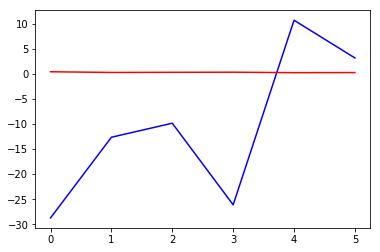

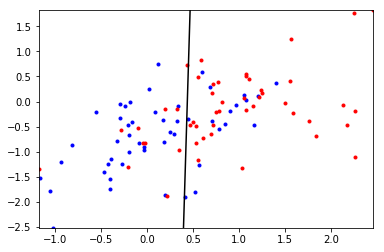

[-0.78700702  1.79560209 -0.02979359]  =>  3.18986450484  /  0.272727272727


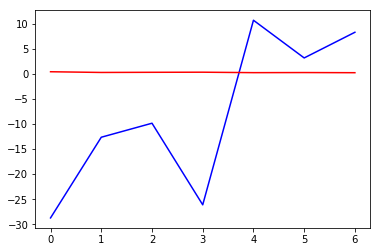

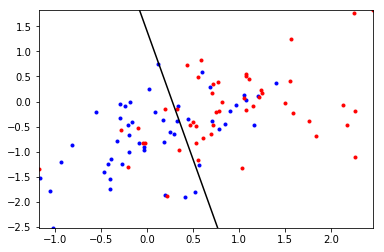

[-0.55916171  2.03355688  0.39879302]  =>  8.31314240252  /  0.242424242424


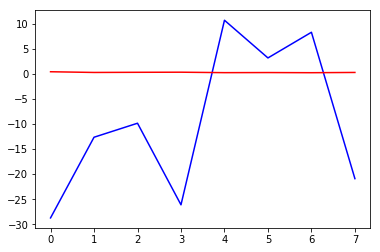

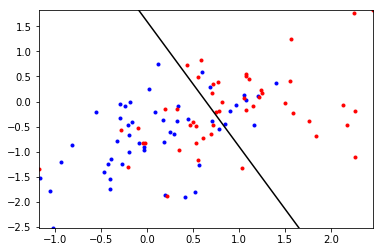

[-1.17937003  1.84025916  0.74025623]  =>  -20.900862148  /  0.292929292929


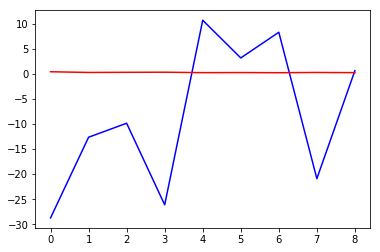

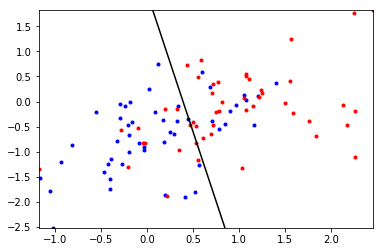

[-0.76189398  1.94503964  0.35247654]  =>  0.654260707168  /  0.252525252525


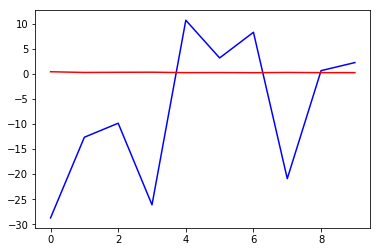

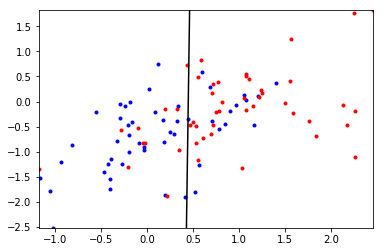

[-0.76765228  1.71108061 -0.01359199]  =>  2.26507675614  /  0.252525252525


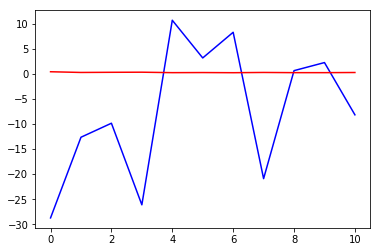

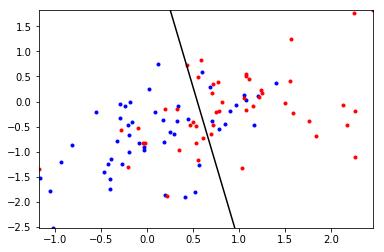

[-0.93211222  1.70362231  0.27582855]  =>  -8.16334452126  /  0.282828282828


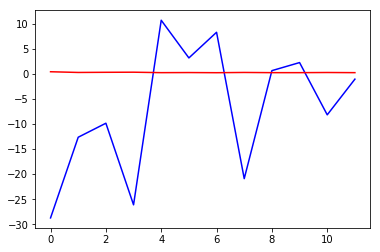

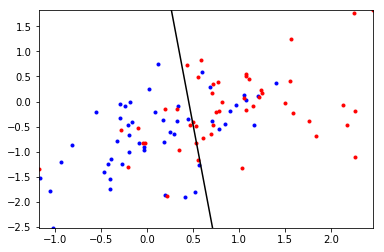

[-0.80903573  1.78638613  0.18452237]  =>  -1.042996544  /  0.252525252525


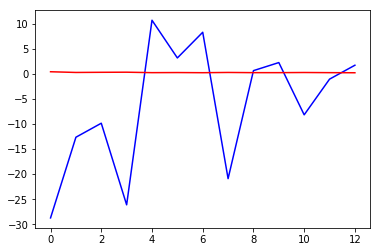

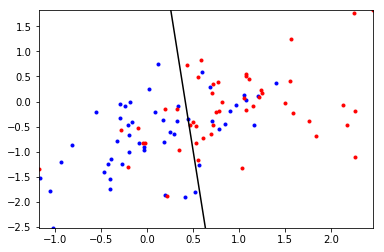

[-0.74645612  1.79304497  0.15563522]  =>  1.73363203685  /  0.232323232323


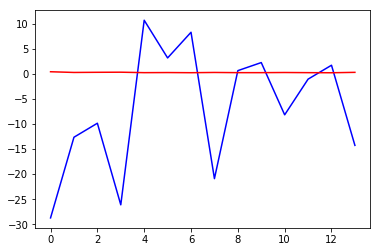

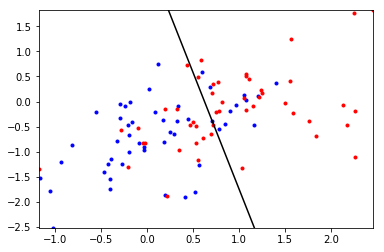

[-1.06886686  1.70923007  0.36877103]  =>  -14.2592522931  /  0.313131313131


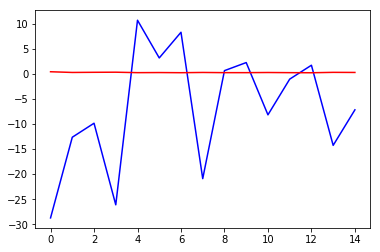

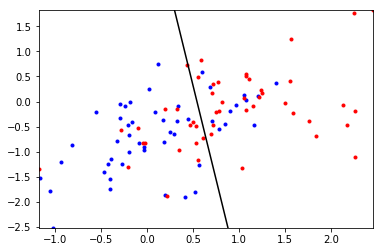

[-0.91726484  1.688861    0.22665858]  =>  -7.16868565486  /  0.292929292929


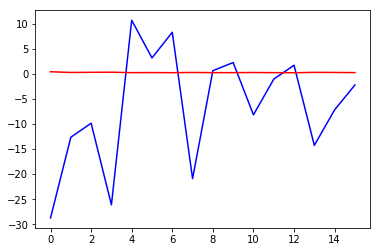

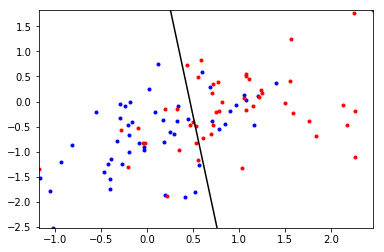

[-0.80529472  1.7230041   0.20151804]  =>  -2.20685059903  /  0.262626262626


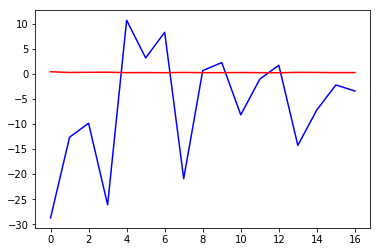

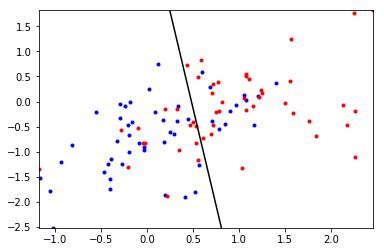

[-0.81589801  1.6893081   0.21911341]  =>  -3.41181962767  /  0.272727272727


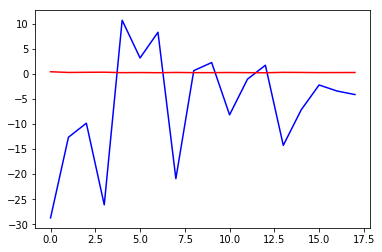

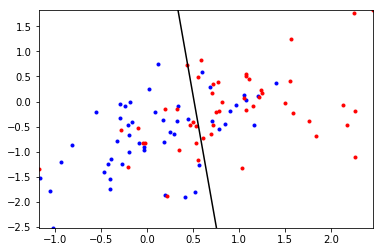

[-0.82311634  1.6061554   0.15502872]  =>  -4.11764795856  /  0.282828282828


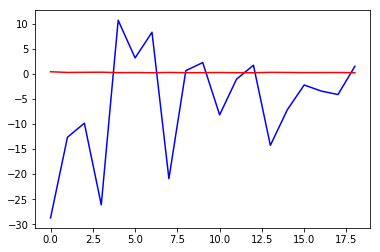

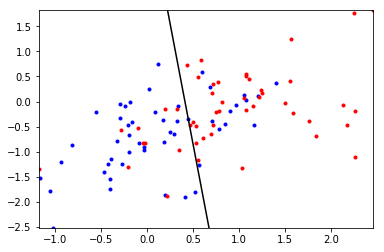

[-0.70836657  1.71771442  0.17880693]  =>  1.52902841503  /  0.232323232323


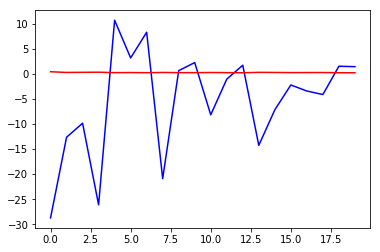

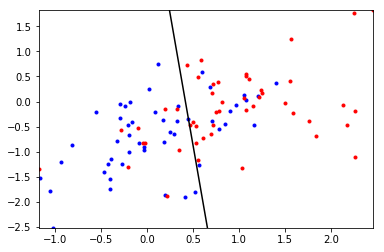

[-0.71695762  1.71759744  0.16369808]  =>  1.45030822136  /  0.232323232323


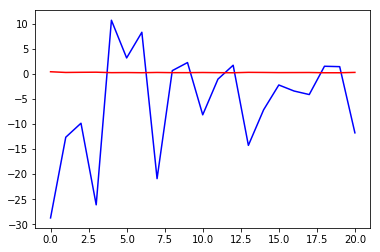

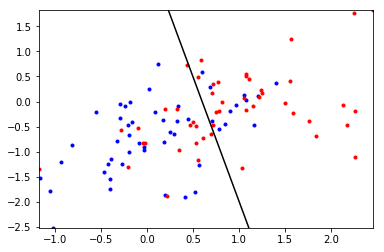

[-0.97025906  1.61831113  0.32705613]  =>  -11.7607359138  /  0.30303030303


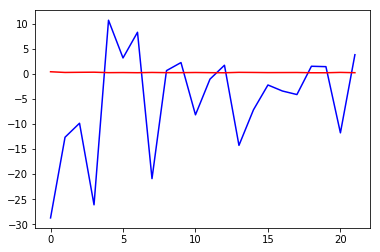

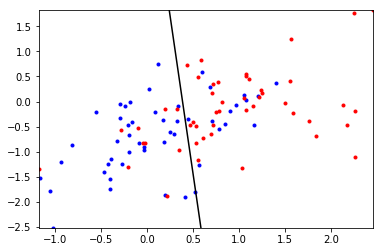

[-0.68297128  1.76788653  0.14061815]  =>  3.83548698792  /  0.242424242424


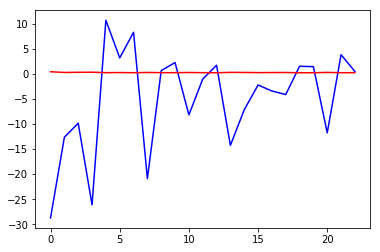

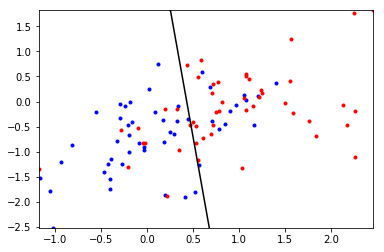

[-0.75199142  1.74158088  0.1701039 ]  =>  0.483210340771  /  0.242424242424


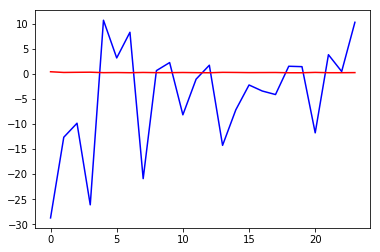

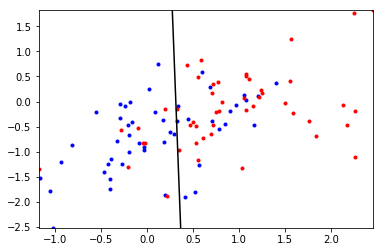

[-0.56636355  1.80872501  0.0380014 ]  =>  10.303764254  /  0.262626262626


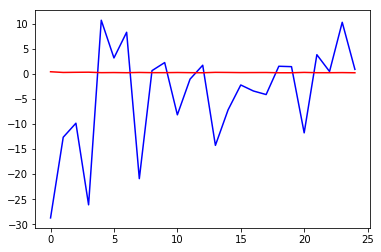

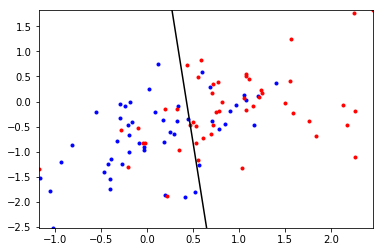

[-0.74672259  1.73844085  0.15100964]  =>  0.913018758253  /  0.232323232323


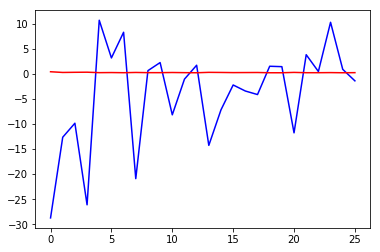

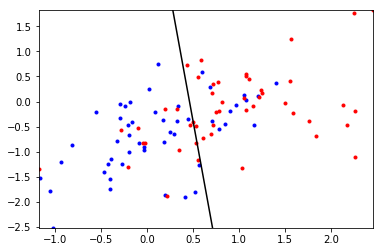

[-0.78535276  1.70031337  0.16955664]  =>  -1.38432996246  /  0.252525252525


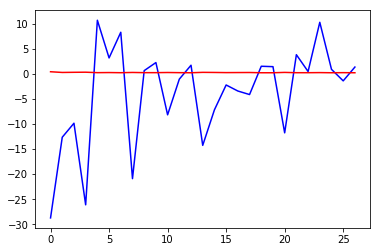

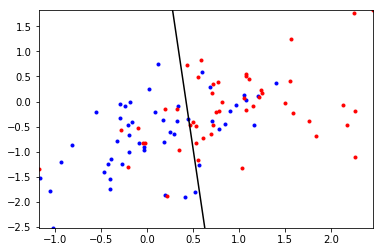

[-0.72501561  1.70611948  0.13786209]  =>  1.37135266948  /  0.232323232323


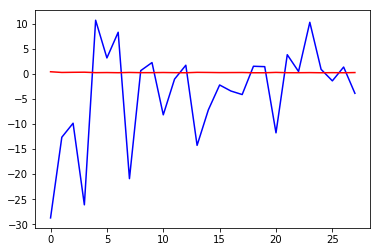

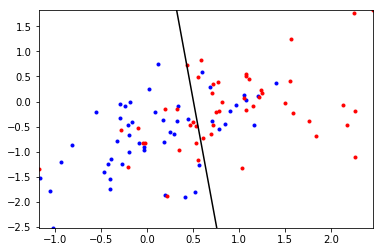

[-0.82560539  1.63435746  0.16456099]  =>  -3.87070203567  /  0.272727272727


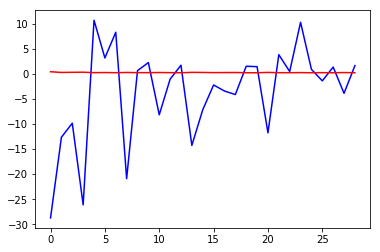

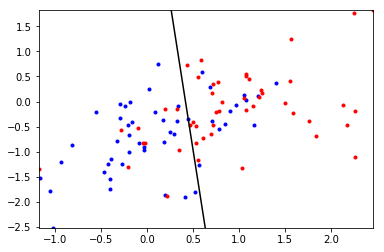

[-0.7198647   1.72087494  0.14702611]  =>  1.65543408302  /  0.232323232323


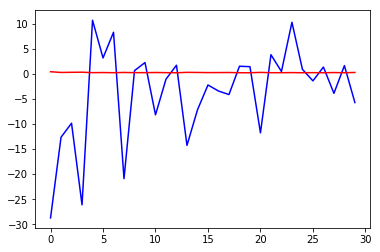

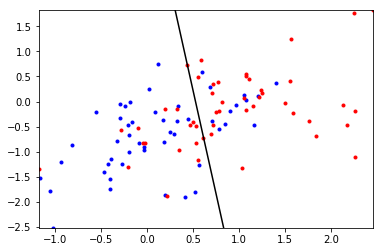

[-0.86431212  1.63875447  0.19948865]  =>  -5.72093048541  /  0.292929292929


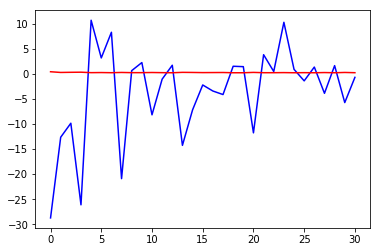

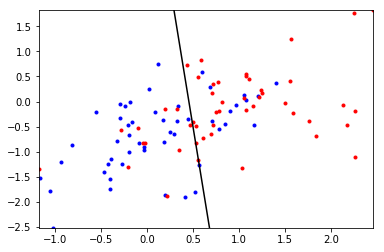

[-0.76661307  1.68383542  0.15014808]  =>  -0.685658427529  /  0.242424242424


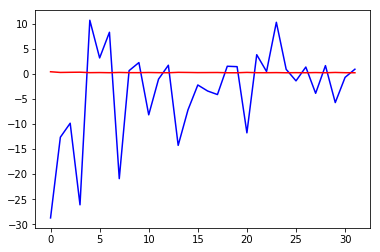

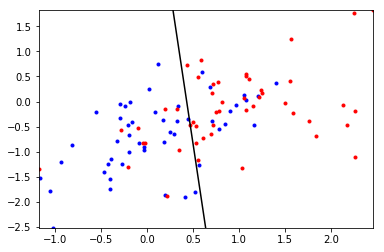

[-0.7340917   1.70112837  0.13945169]  =>  0.937673942836  /  0.232323232323


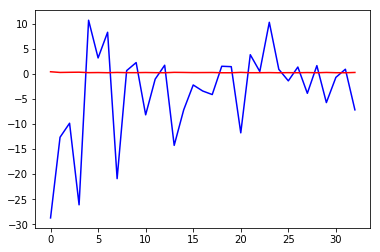

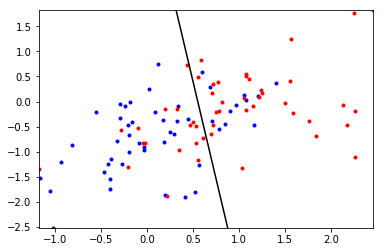

[-0.88140421  1.59688051  0.20663703]  =>  -7.17168717449  /  0.292929292929


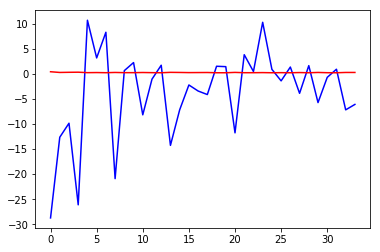

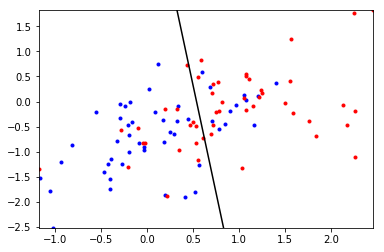

[-0.85897343  1.59514037  0.1865084 ]  =>  -6.08664364145  /  0.292929292929


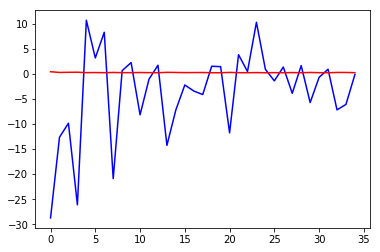

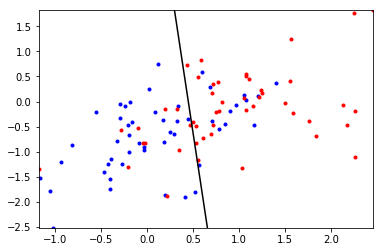

[-0.74776859  1.66552683  0.1377069 ]  =>  -0.115485453214  /  0.242424242424


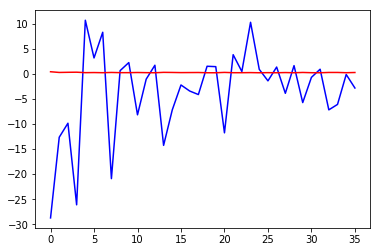

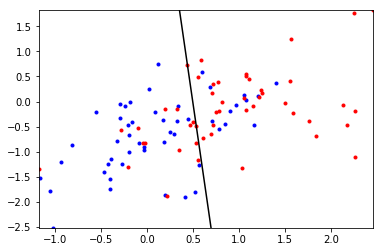

[-0.80186469  1.61295949  0.12776259]  =>  -2.81233627591  /  0.282828282828


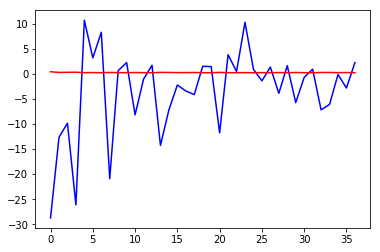

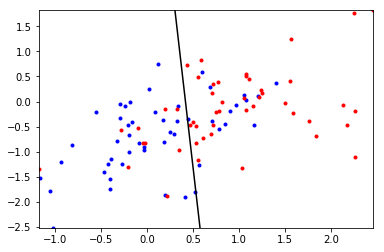

[-0.7065253   1.69009957  0.10641571]  =>  2.26793368003  /  0.242424242424


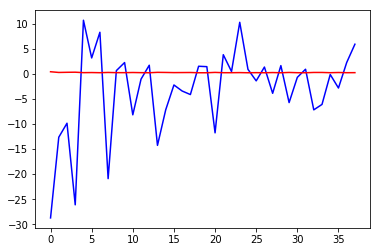

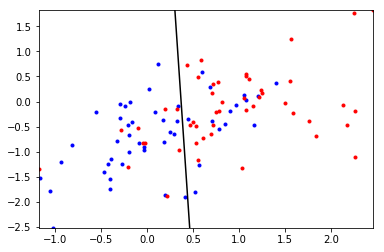

[-0.63866919  1.72297314  0.06402669]  =>  5.92814960338  /  0.252525252525


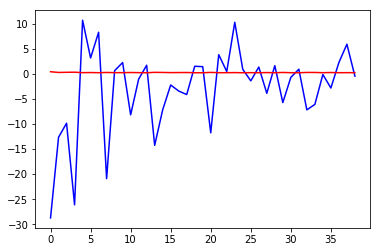

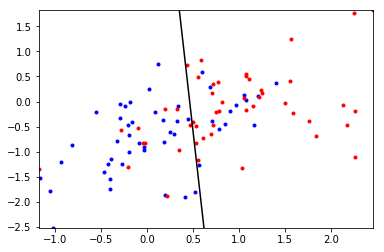

[-0.75928581  1.63702414  0.1012243 ]  =>  -0.445449664631  /  0.242424242424


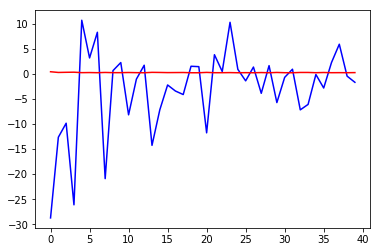

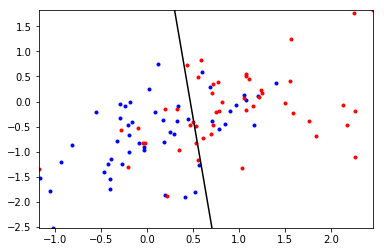

[-0.78122463  1.66119825  0.15580258]  =>  -1.67672295872  /  0.262626262626


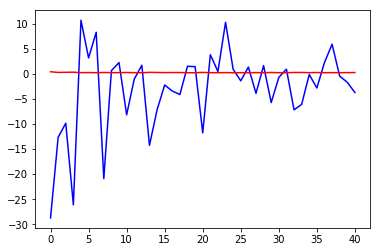

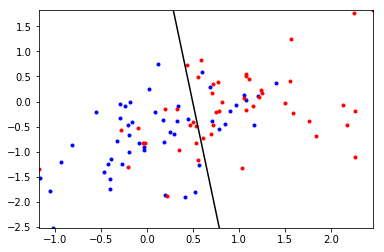

[-0.81520686  1.64407846  0.18970548]  =>  -3.70756636928  /  0.272727272727


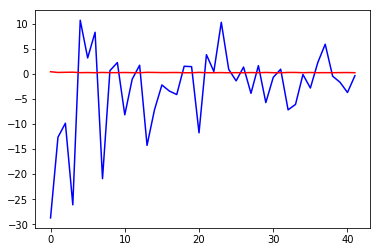

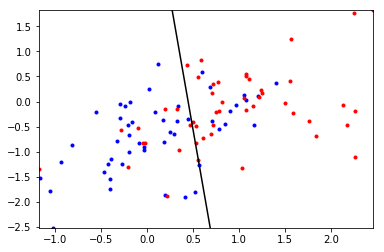

[-0.75449725  1.68778207  0.16127806]  =>  -0.352932454517  /  0.242424242424


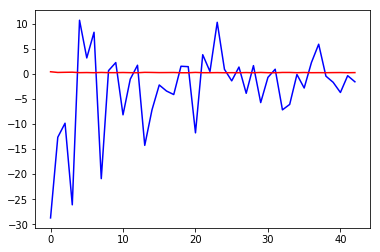

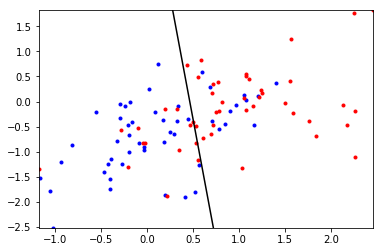

[-0.77506758  1.66753543  0.17041711]  =>  -1.57061556988  /  0.262626262626


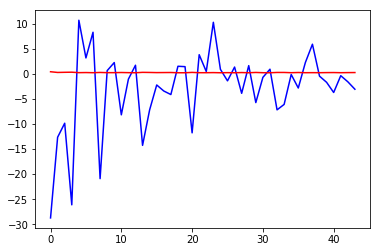

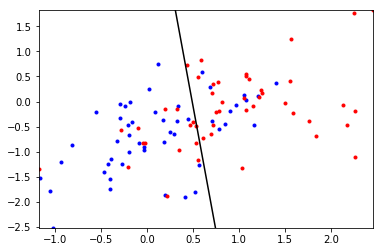

[-0.80629709  1.64166333  0.16533074]  =>  -3.0580165291  /  0.272727272727


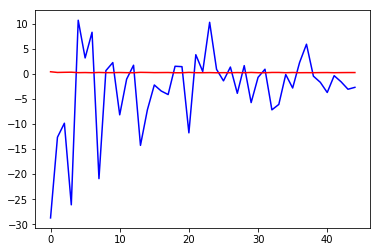

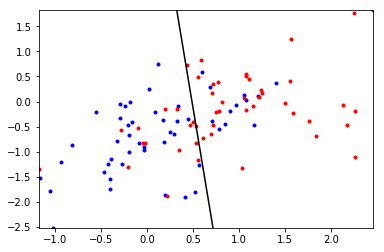

[-0.80235571  1.64120597  0.14923156]  =>  -2.67869286657  /  0.272727272727


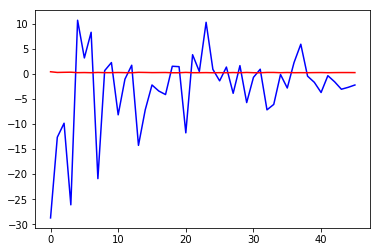

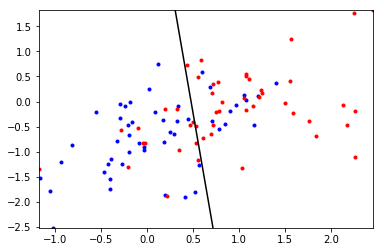

[-0.79274863  1.6554536   0.15712321]  =>  -2.21037609794  /  0.262626262626


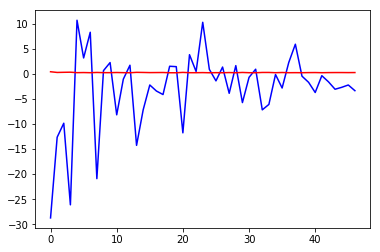

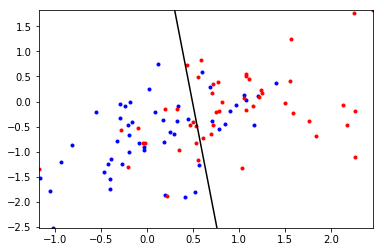

[-0.81298201  1.64734864  0.17480267]  =>  -3.34726326023  /  0.272727272727


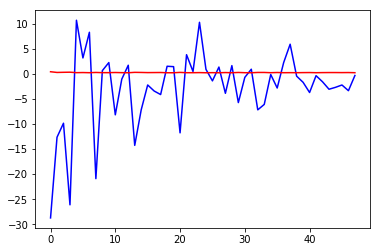

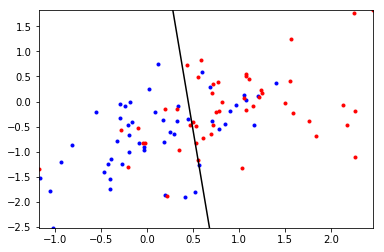

[-0.75237874  1.67927609  0.15455233]  =>  -0.313792217483  /  0.242424242424


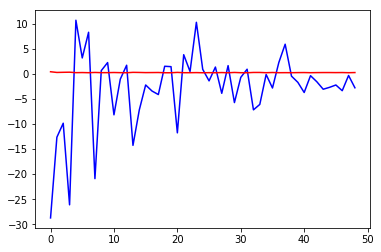

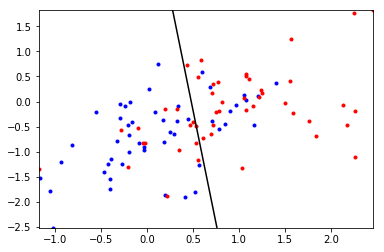

[-0.80145457  1.66677061  0.18562519]  =>  -2.76677461269  /  0.272727272727


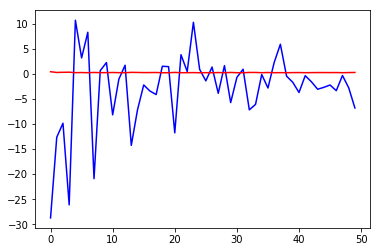

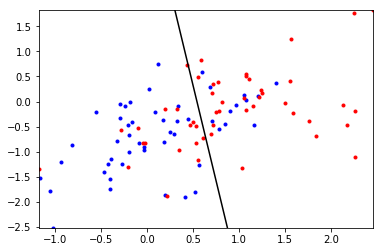

[-0.87769107  1.61630812  0.21321475]  =>  -6.79641086146  /  0.292929292929


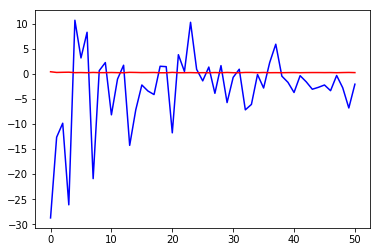

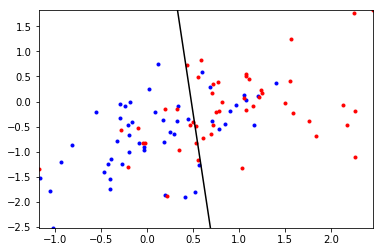

[-0.79159061  1.64318418  0.13576129]  =>  -2.04924737312  /  0.262626262626


In [14]:
learner = logisticClassify2()
learner.train(XB,YB, stopEpochs=50)

# Problem 2: Maximum Margin Classifiers

## Part 1

# Problem 3: Statement of Collaboration

I did not collaborate with any other student on this project. All work is my own. 